In [4]:
%pip install langchain

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install -U langchain-community

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install faiss-cpu

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install pypdf

Note: you may need to restart the kernel to use updated packages.


<!-- 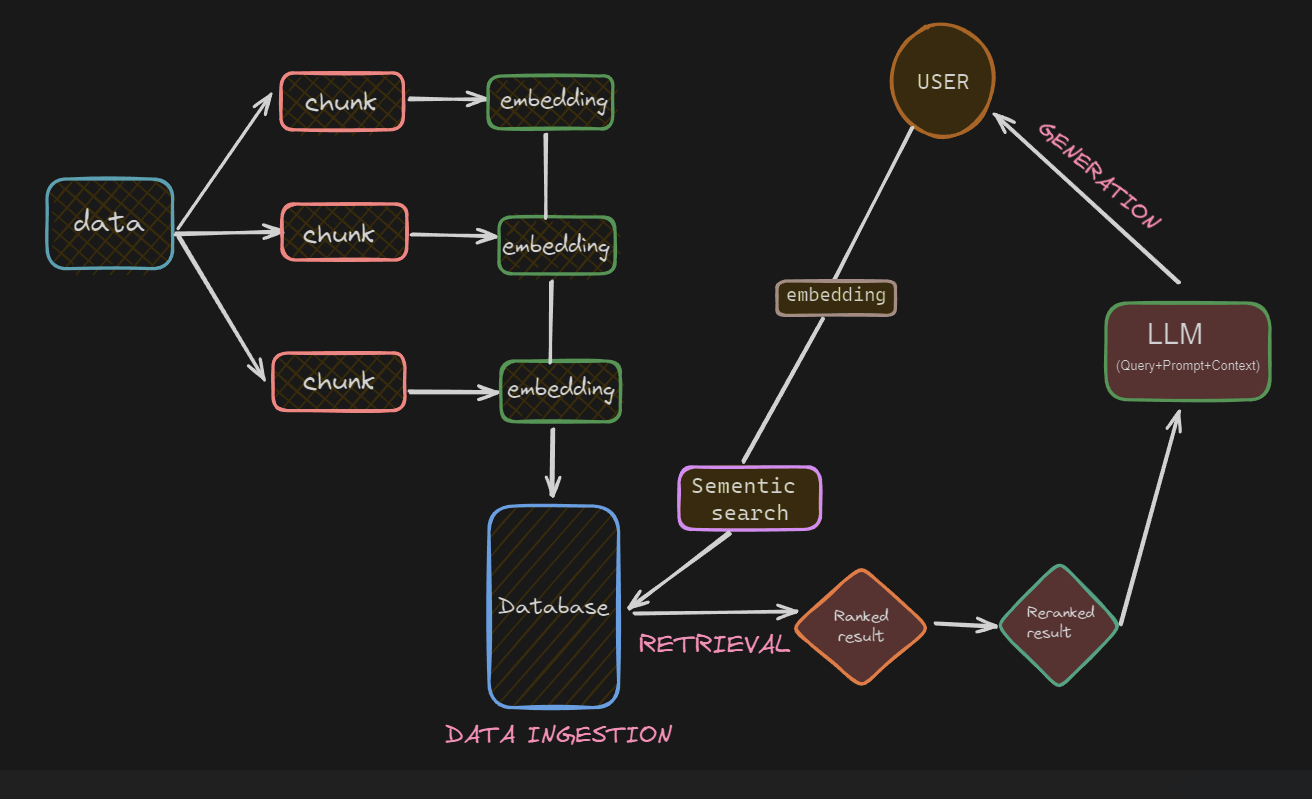 -->

# RAG Having Three main Stages

1. Data Ingestion
2. Data Retrieval
3. Data Generation

In [9]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA

In [10]:
ls

faiss_index_/     GameOfThron.pdf          RomanEmpire.pdf
GameOfThron1.pdf  RAG_with_LLAMA3.2.ipynb


In [11]:
# Load document using PyPDFLoader document loader
loader = PyPDFLoader("RomanEmpire.pdf")
documents = loader.load()

In [12]:
for i in documents:
    print(i, "\n")


page_content='The Rise and Fall of the Roman Empire
The Roman Empire, one of the most powerful civilizations in history, shaped the world with its 
culture, governance, and military prowess. Its history spans from its legendary founding in 753 
BCE to its eventual fall in the West in 476 CE.
The Founding of Rome
According to legend, Rome was founded by Romulus and Remus in 753 BCE. Initially a small 
city-state, Rome's strategic location on the Tiber River allowed it to grow into a thriving kingdom. 
By 509 BCE, Rome transitioned from a monarchy to a republic, with governance led by elected 
officials and a Senate.
The Roman Republic (509 BCE - 27 BCE)
During the Republic, Rome expanded its influence through conquests and alliances. Key events 
included the Punic Wars against Carthage (264-146 BCE), which culminated in Rome's dominance 
over the western Mediterranean. The Republic, however, faced internal strife. In 44 BCE, Julius 
Caesar, a military general and dictator, was assassina

In [13]:
#Splitting the data into chunk
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=30, separator="\n")
docs = text_splitter.split_documents(documents=documents)

In [14]:
docs

[Document(metadata={'source': 'RomanEmpire.pdf', 'page': 0}, page_content="The Rise and Fall of the Roman Empire\nThe Roman Empire, one of the most powerful civilizations in history, shaped the world with its \nculture, governance, and military prowess. Its history spans from its legendary founding in 753 \nBCE to its eventual fall in the West in 476 CE.\nThe Founding of Rome\nAccording to legend, Rome was founded by Romulus and Remus in 753 BCE. Initially a small \ncity-state, Rome's strategic location on the Tiber River allowed it to grow into a thriving kingdom. \nBy 509 BCE, Rome transitioned from a monarchy to a republic, with governance led by elected \nofficials and a Senate.\nThe Roman Republic (509 BCE - 27 BCE)\nDuring the Republic, Rome expanded its influence through conquests and alliances. Key events \nincluded the Punic Wars against Carthage (264-146 BCE), which culminated in Rome's dominance \nover the western Mediterranean. The Republic, however, faced internal strife. 

# MTEB: Massive Text Embedding Benchmark

#### The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

BGE(BAAI general embedding)
BAAI: https://huggingface.co/BAAI

**Dataset size:**  Larger datasets generally benefit from more powerful models like MPNet.

**Computational resources:**  If you have limited resources, BGE Small En or MiniLM might be better options.

**Task complexity:**  For complex tasks like question answering or text summarization, MPNet is often preferred.

**Embedding dimensionality:**  Different models produce embeddings of varying dimensions.Choose based on downstream task requirements.

**Performance vs. efficiency trade-off:** Decide if you prioritize high accuracy or faster processing

MPNET: Masked and Permuted Pre-training for Language Understanding.

https://huggingface.co/sentence-transformers

https://huggingface.co/spaces/mteb/leaderboard

https://huggingface.co/blog/mteb


In [15]:
#loading the embedding model from huggingface
embedding_model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cpu"}
embeddings = HuggingFaceEmbeddings(
  model_name=embedding_model_name,
  model_kwargs=model_kwargs
)

/tmp/ipykernel_59627/1867721472.py:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(
2024-12-12 18:27:40.703610: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 18:27:40.913533: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 18:27:41.078036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734010061.230018   596

In [16]:
%pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


# Why Use FAISS

1. Efficiency
2. Versatility
3. Scalability
4. Integration
5. GPU Support

# Security Considerations

1. Data Control
2. Reduced Exposure
3. Compliance
4. Latency and Performance
5. Network Security

In [17]:
#loading the data and correspond embedding into the FAISS
vectorstore = FAISS.from_documents(docs, embeddings)

In [18]:
# Persist the vectors locally on disk
vectorstore.save_local("faiss_index_")

In [19]:
# Load from local storage
persisted_vectorstore = FAISS.load_local("faiss_index_", embeddings,allow_dangerous_deserialization=True)

In [20]:
#creating a retriever on top of database
retriever = persisted_vectorstore.as_retriever()

In [21]:
from langchain_community.llms import Ollama

In [22]:
# Initialize an instance of the Ollama model
llm = Ollama(model="llama3.2")

/tmp/ipykernel_59627/2383744197.py:2: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3.2")


In [23]:
# Invoke the model to generate responses
response = llm.invoke("Tell me a new joke")
print(response)

Here's one:

A man walked into a library and asked the librarian, "Do you have any books on Pavlov's dogs and Schrödinger's cat?"

The librarian replied, "It rings a bell, but I'm not sure if it's here or not."


In [24]:
 #Use RetrievalQA chain for orchestration
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever)

In [25]:
query1 = "Who was the first emperor of the Roman Empire?"
query2 = "When was Rome founded according to legend?"

queries = [query1, query2]

for i in range(len(queries)):
    result = qa.run(queries[i])
    print(queries[i], "\n", result)

/tmp/ipykernel_59627/4095295877.py:7: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa.run(queries[i])


Who was the first emperor of the Roman Empire? 
 According to the context, Octavian became Augustus, the first emperor of Rome, in 27 BCE.
When was Rome founded according to legend? 
 Rome was founded according to legend in 753 BCE.
